<a href="https://colab.research.google.com/github/eldorjonneymatov/fastai_learning_process/blob/master/notebooks/production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai

In [2]:
!pip install -Uqq duckduckgo_search

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [4]:
from fastai.vision.all import *
searches = 'black', 'grizzly', 'teddy'
path = Path('bears')
from time import sleep

for o in searches:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{o} bear', max_images=250))
  sleep(10)

In [5]:
fns = get_image_files(path)
fns

(#1183) [Path('bears/teddy/5d79aac0-b144-4c7c-946a-dd9545f04ec3.jpg'),Path('bears/teddy/822afacc-4adf-4c70-8a42-a7afed2b0569.jpg'),Path('bears/teddy/508759fe-c6d2-428d-a74e-3e8f03754e8c.jpg'),Path('bears/teddy/8c6bea54-1098-4653-a64c-ead0fa447415.jpg'),Path('bears/teddy/3c1bc387-5f80-4e37-826c-5b85609b2063.jpg'),Path('bears/teddy/6f4a1842-8579-4574-af85-bdc91bfeac0b.jpg'),Path('bears/teddy/b2253344-9fd2-45cc-b4a0-90988ae66bba.jpg'),Path('bears/teddy/9106ea86-63fc-446a-bd70-c6e4f9204337.jpg'),Path('bears/teddy/7c403536-6e54-419a-b7b5-c36819a7d547.jpg'),Path('bears/teddy/2f7a625a-c770-4ba2-bb16-46c886f63268.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#24) [Path('bears/teddy/eefecb29-1692-41b3-8011-1c89dfbd1899.jpg'),Path('bears/teddy/9d819acc-2d19-4bc4-b5f0-e205ec34431b.jpg'),Path('bears/teddy/65306985-10ab-4851-9adc-f74642bbe52c.JPG'),Path('bears/teddy/22e631cc-48cd-4ceb-9162-d7b8b793c3a4.jpg'),Path('bears/teddy/54dede23-4afa-4c64-b427-7a8cd070842b.JPG'),Path('bears/teddy/fd2ec475-6ea8-4bfc-8e01-7a74d11eaa7c.jpg'),Path('bears/teddy/4c36f995-fd70-4350-8bdd-478c274faa5e.JPG'),Path('bears/teddy/86e0cebd-ff21-4950-adb4-2524ee9be790.jpg'),Path('bears/teddy/f4dcf3d3-d342-4409-8ebc-670a102db446.JPG'),Path('bears/teddy/367b1bca-c333-49c2-904f-b14ac71ff69b.JPG')...]

In [7]:
failed.map(Path.unlink)

(#24) [None,None,None,None,None,None,None,None,None,None...]

In [8]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(192, method='squish'),
    batch_tfms = aug_transforms()
)

In [9]:
dls = bears.dataloaders(path)

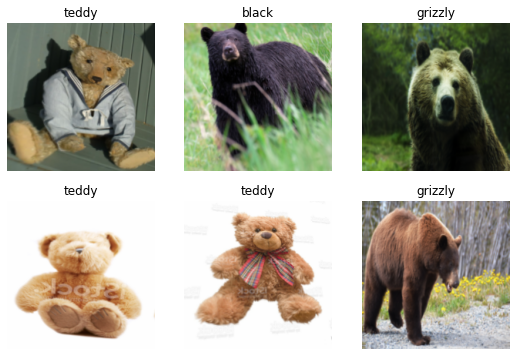

In [10]:
dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.771018,0.281427,0.043290,01:14


epoch,train_loss,valid_loss,error_rate,time
0,0.157611,0.176947,0.047619,01:09
1,0.122865,0.166703,0.034632,01:10
2,0.120313,0.135113,0.021645,01:08
3,0.095875,0.137301,0.021645,01:10


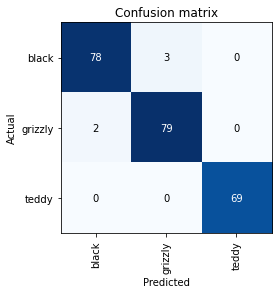

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

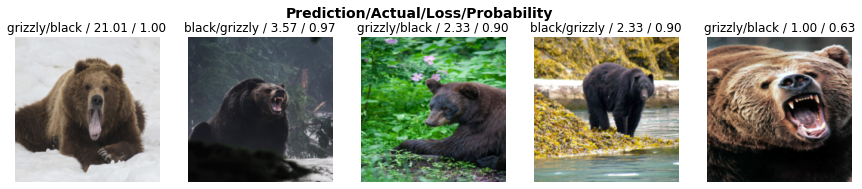

In [13]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
from fastai.vision.widgets import *
from google.colab import output
output.enable_custom_widget_manager()

cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
# dls = bears.dataloaders(path)
# learn = vision_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.602649,0.092193,0.023179,04:13


epoch,train_loss,valid_loss,error_rate,time
0,0.094404,0.027829,0.006623,05:24
1,0.082079,0.036456,0.013245,05:22
2,0.061417,0.031217,0.006623,05:23


In [22]:
learn.export('bears.pkl')

In [26]:
!git clone https://<token>@github.com/eldorjonneymatov/fastai_learning_process.git

Cloning into 'fastai_learning_process'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 27 (delta 6), reused 18 (delta 5), pack-reused 4
Unpacking objects: 100% (27/27), 42.00 MiB | 10.95 MiB/s, done.


In [27]:
!mv bears.pkl fastai_learning_process/models/

In [28]:
%cd fastai_learning_process

/content/fastai_learning_process


In [32]:
!git add .

In [33]:
!git config --global user.email <email>
!git commit -m "Add bears model"

[master 9f9a3d2] Add bears model
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 models/bears.pkl


In [34]:
!git push origin master

Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 41.53 MiB | 10.99 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/eldorjonneymatov/fastai_learning_process.git
   9e4e147..9f9a3d2  master -> master
